In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression


sns.set_theme()
%matplotlib  inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('loan_data_set.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df['Gender'][df['Gender'].isnull()] = df['Gender'].dropna().sample(df['Gender'].isnull().sum()).values
df['Married'][df['Married'].isnull()] = df['Married'].dropna().sample(df['Married'].isnull().sum()).values
df['Dependents'][df['Dependents'].isnull()] = df['Dependents'].dropna().sample(df['Dependents'].isnull().sum()).values
df['Self_Employed'][df['Self_Employed'].isnull()] = df['Self_Employed'].dropna().sample(df['Self_Employed'].isnull().sum()).values
df['LoanAmount'][df['LoanAmount'].isnull()] = df['LoanAmount'].dropna().sample(df['LoanAmount'].isnull().sum()).values
df['Loan_Amount_Term'][df['Loan_Amount_Term'].isnull()] = df['Loan_Amount_Term'].dropna().sample(df['Loan_Amount_Term'].isnull().sum()).values
df['Credit_History'][df['Credit_History'].isnull()] = df['Credit_History'].dropna().sample(df['Credit_History'].isnull().sum()).values

In [6]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [7]:
df['Dependents'].replace('3+', '3', inplace=True)

In [8]:
df['Dependents'].head(10)

0    0
1    1
2    0
3    0
4    0
5    2
6    0
7    3
8    2
9    1
Name: Dependents, dtype: object

In [9]:
df['Dependents'] = df['Dependents'].astype('float')

In [10]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
df.drop('Loan_ID', inplace=True, axis=1)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
df['Credit_History'].value_counts()

1.0    521
0.0     93
Name: Credit_History, dtype: int64

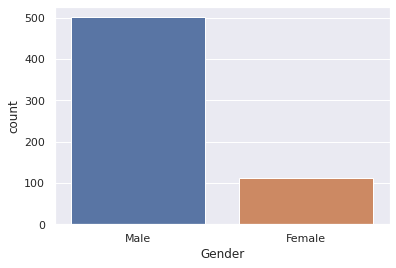

In [13]:
import seaborn as sns
sns.countplot(df['Gender'])

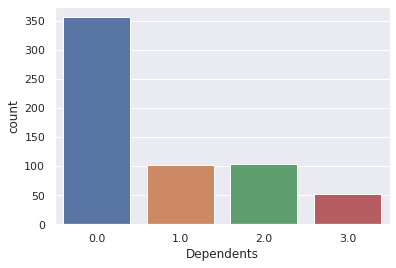

In [14]:
sns.countplot(df.Dependents)

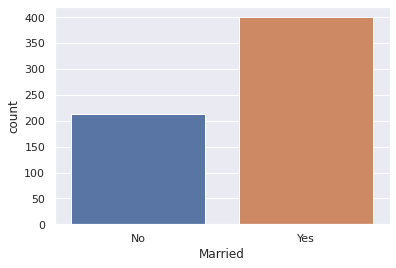

In [15]:
sns.countplot(df.Married)

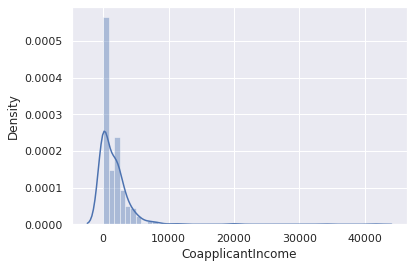

In [16]:
sns.distplot(df.CoapplicantIncome)

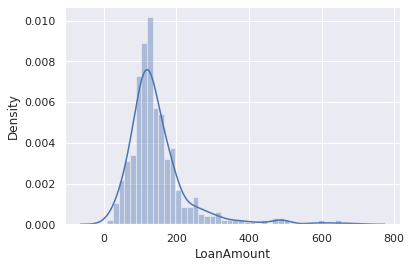

In [17]:
sns.distplot(df.LoanAmount)

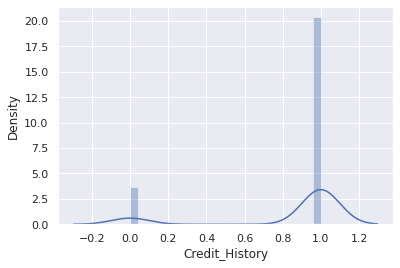

In [18]:
sns.distplot(df.Credit_History)

In [19]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [20]:
df['Total_income'] = df['ApplicantIncome']+df['CoapplicantIncome']

In [21]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income
0,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


In [22]:
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])

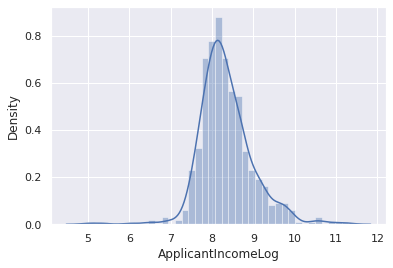

In [23]:
sns.distplot(df.ApplicantIncomeLog)

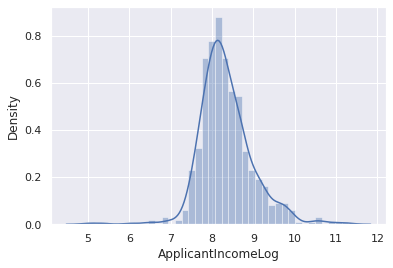

In [24]:
df['CoapplicantIncomeLog'] = np.log(df['CoapplicantIncome'])
sns.distplot(df["ApplicantIncomeLog"])

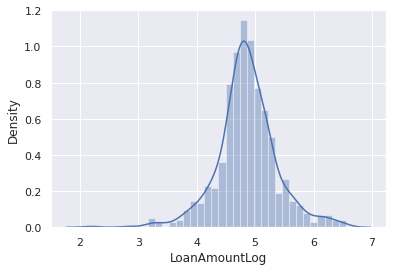

In [25]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.distplot(df["LoanAmountLog"])

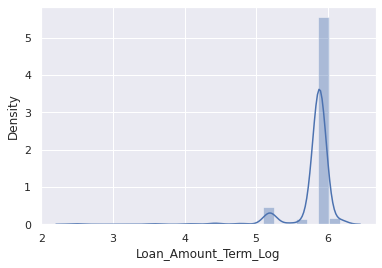

In [26]:
df['Loan_Amount_Term_Log'] = np.log(df['Loan_Amount_Term'])
sns.distplot(df["Loan_Amount_Term_Log"])

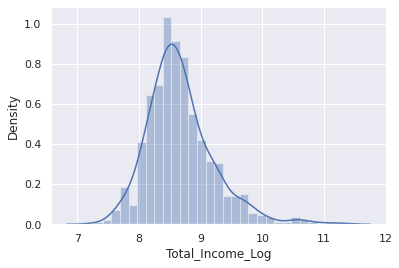

In [27]:
df['Total_Income_Log'] = np.log(df['Total_income'])
sns.distplot(df["Total_Income_Log"])

In [28]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_income,ApplicantIncomeLog,CoapplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0,8.674026,-inf,4.852030,5.886104,8.674026
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,8.430109,7.318540,4.852030,5.886104,8.714568
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,8.006368,-inf,4.189655,5.886104,8.006368
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,7.856707,7.765569,4.787492,5.886104,8.505323
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,8.699515,-inf,4.948760,5.886104,8.699515


In [30]:
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_income", 'CoapplicantIncomeLog']
df = df.drop(columns=cols, axis=1)

In [31]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log
0,Male,No,0.0,Graduate,No,1.0,Urban,Y,8.674026,4.852030,5.886104,8.674026
1,Male,Yes,1.0,Graduate,No,1.0,Rural,N,8.430109,4.852030,5.886104,8.714568
2,Male,Yes,0.0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,5.886104,8.006368
3,Male,Yes,0.0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,5.886104,8.505323
4,Male,No,0.0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,5.886104,8.699515


#Handling Categorical data

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Gender                614 non-null    object 
 1   Married               614 non-null    object 
 2   Dependents            614 non-null    float64
 3   Education             614 non-null    object 
 4   Self_Employed         614 non-null    object 
 5   Credit_History        614 non-null    float64
 6   Property_Area         614 non-null    object 
 7   Loan_Status           614 non-null    object 
 8   ApplicantIncomeLog    614 non-null    float64
 9   LoanAmountLog         614 non-null    float64
 10  Loan_Amount_Term_Log  614 non-null    float64
 11  Total_Income_Log      614 non-null    float64
dtypes: float64(6), object(6)
memory usage: 57.7+ KB


In [33]:
d1 = pd.get_dummies(df['Gender'], drop_first= True)
d2 = pd.get_dummies(df['Married'], drop_first= True)
d3 = pd.get_dummies(df['Dependents'], drop_first= True)
d4 = pd.get_dummies(df['Education'], drop_first= True)
d5 = pd.get_dummies(df['Self_Employed'], drop_first= True)
d6 = pd.get_dummies(df['Property_Area'], drop_first= True)



df1 = pd.concat([df, d1, d2, d3, d4, d5, d6], axis = 1)
df=df1

cols = ['Gender', 'Married', "Dependents", "Education", "Self_Employed", 'Property_Area']
df = df.drop(columns=cols, axis=1)

In [34]:
df.head()

,Credit_History,Loan_Status,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1.0,2.0,3.0,Not Graduate,Yes,Semiurban,Urban
0,1.0,Y,8.674026,4.852030,5.886104,8.674026,1,0,0,0,0,0,0,0,1
1,1.0,N,8.430109,4.852030,5.886104,8.714568,1,1,1,0,0,0,0,0,0
2,1.0,Y,8.006368,4.189655,5.886104,8.006368,1,1,0,0,0,0,1,0,1
3,1.0,Y,7.856707,4.787492,5.886104,8.505323,1,1,0,0,0,1,0,0,1
4,1.0,Y,8.699515,4.948760,5.886104,8.699515,1,0,0,0,0,0,0,0,1


In [35]:
df.describe()

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1.0,2.0,3.0,Not Graduate,Yes,Semiurban,Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.848534,8.341213,4.862082,5.798163,8.669414,0.815961,0.651466,0.166124,0.169381,0.084691,0.218241,0.135179,0.379479,0.328990
std,0.358795,0.645263,0.513742,0.340469,0.545102,0.387832,0.476895,0.372495,0.375394,0.278648,0.413389,0.342194,0.485653,0.470229
min,0.000000,5.010635,2.197225,2.484907,7.273786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.964677,4.605170,5.886104,8.334712,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8.246040,4.852030,5.886104,8.597205,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,8.664750,5.123964,5.886104,8.925549,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,11.302204,6.551080,6.173786,11.302204,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Split Datasets

In [36]:
x = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [37]:
x

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1.0,2.0,3.0,Not Graduate,Yes,Semiurban,Urban
0,1.0,8.674026,4.852030,5.886104,8.674026,1,0,0,0,0,0,0,0,1
1,1.0,8.430109,4.852030,5.886104,8.714568,1,1,1,0,0,0,0,0,0
2,1.0,8.006368,4.189655,5.886104,8.006368,1,1,0,0,0,0,1,0,1
3,1.0,7.856707,4.787492,5.886104,8.505323,1,1,0,0,0,1,0,0,1
4,1.0,8.699515,4.948760,5.886104,8.699515,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,7.972466,4.262680,5.886104,7.972466,0,0,0,0,0,0,0,0,0
610,1.0,8.320205,3.688879,5.192957,8.320205,1,1,0,0,1,0,0,0,0
611,1.0,8.996157,5.533389,5.886104,9.025456,1,1,1,0,0,0,0,0,1
612,1.0,8.933664,5.231109,5.886104,8.933664,1,1,0,1,0,0,0,0,1


In [38]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [48]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(x_train, y_train)
print("Accuracy is", model3.score(x_test, y_test)*100)

Accuracy is 76.62337662337663


In [49]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[22, 32],
       [ 5, 95]])

In [51]:
import pickle
file = open('loan.pkl', 'wb')
pickle.dump(lg, file)
file.close()

In [52]:
model = open('loan.pkl', 'rb')
forest = pickle.load(model)